In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import uproot

In [2]:
df = pd.read_csv("DATA/24.3127.csv", skiprows=11)
df.head()

,Second,Value
0,-0.000276,-0.016667
1,-0.000276,0.003333
2,-0.000276,0.005000
3,-0.000276,0.001667
4,-0.000276,0.001667


Text(0, 0.5, 'Voltage [V]')

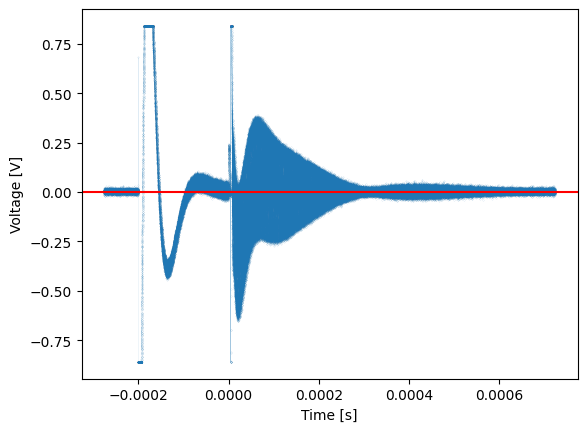

In [3]:
plt.plot(df['Second'],df['Value'],'-o', linewidth=0.05, markersize=0.05)
plt.axhline(y=0, color='r', linestyle='-' )
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')

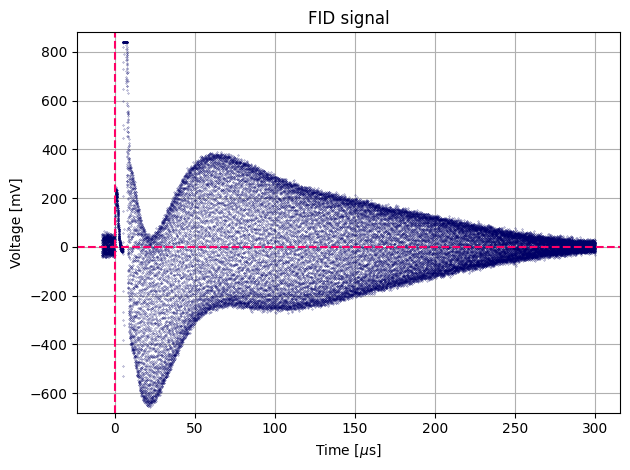

In [12]:
decay = df[(df['Second'] > -0.08e-4) & (df['Second'] < 3.e-04)]
plt.plot(decay['Second']*1e6,decay['Value']*1000,'.', color='#000066', alpha=0.8, markersize=0.5)
plt.axhline(y=0, color='#FF0066', linestyle='--', linewidth=1.5)
plt.axvline(x=0, color='#FF0066', linestyle='--', linewidth=1.5)
plt.ylim((-680, 880))
plt.xlabel('Time [$\mu$s]')
plt.ylabel('Voltage [mV]')
plt.title('FID signal')
plt.grid()
plt.tight_layout()


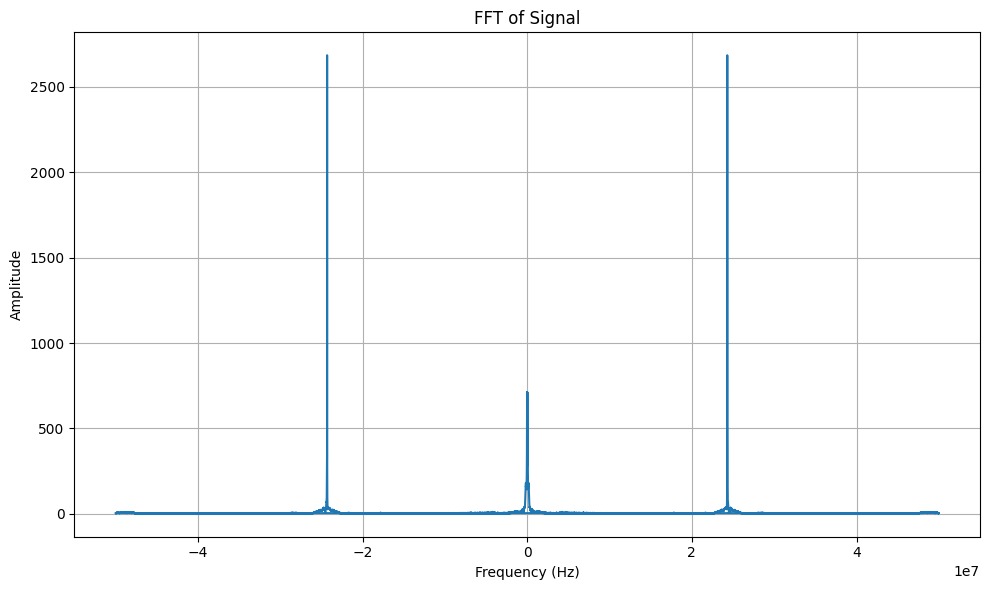

In [5]:
time_values = decay['Second'].values
voltage_values = decay['Value'].values

# Calculate the time interval
time_interval = time_values[1] - time_values[0]

# Perform FFT
fft_values = np.fft.fft(voltage_values)
frequencies = np.fft.fftfreq(len(fft_values), d=time_interval)
plt.figure(figsize=(10, 6))
plt.plot(frequencies, np.abs(fft_values))
plt.title('FFT of Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()

plt.show()

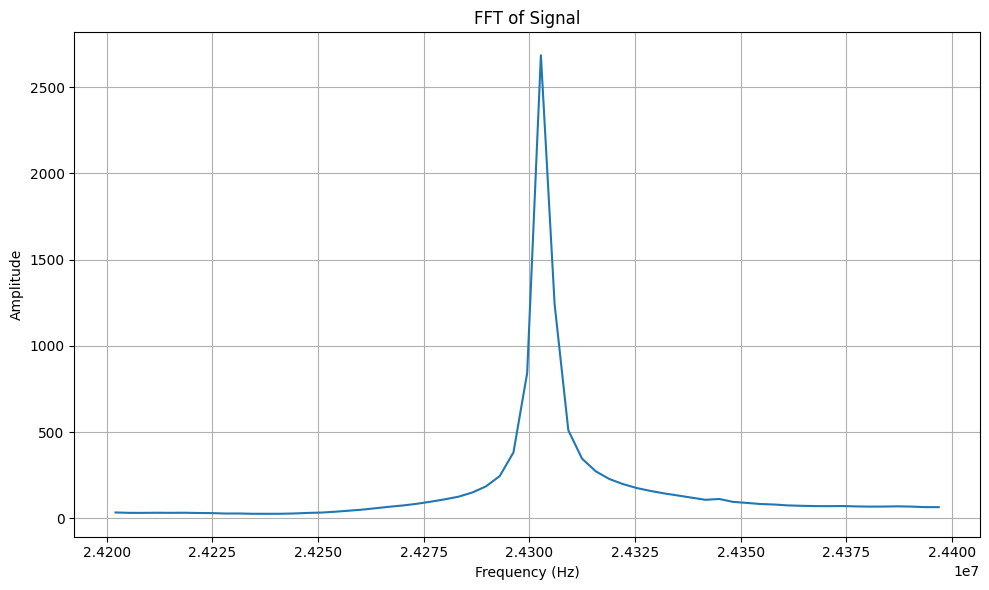

In [6]:
mask = (frequencies > 24.2e6) & (frequencies < 24.4e6)
plt.figure(figsize=(10, 6))
plt.plot(frequencies[mask], np.abs(fft_values[mask]))
plt.title('FFT of Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()

plt.show()

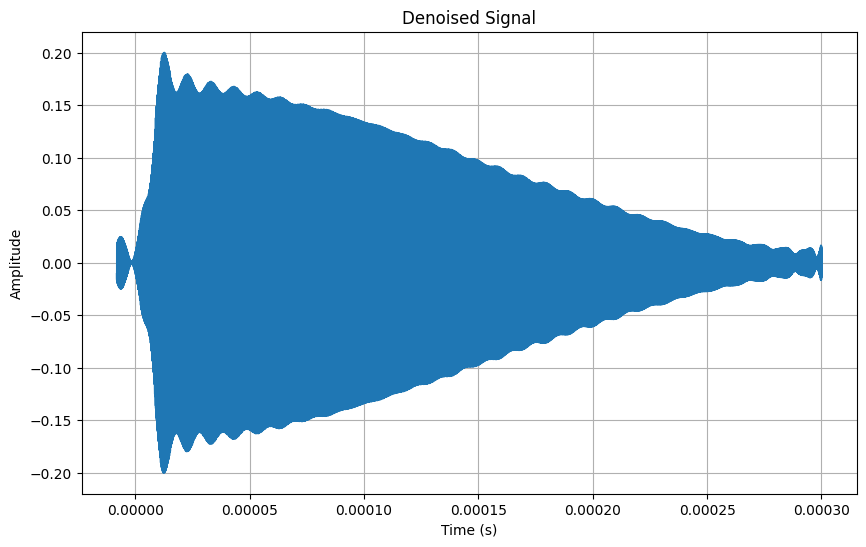

In [7]:
filtered_fft_values = fft_values.copy()  # Make a copy to preserve original FFT values
filtered_fft_values[~mask] = 0  # Zero out frequencies outside the desired range

# Perform inverse FFT to reconstruct the denoised signal
denoised_signal = np.fft.ifft(filtered_fft_values)

# Plot the denoised signal
plt.figure(figsize=(10, 6))
plt.plot(time_values, np.real(denoised_signal))  # Use np.real() to get the real part of the signal
plt.title('Denoised Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

Qui fare fit campana, la cui altezza e larghezza è collegata all'esponente dell'esponenziale


In [8]:

import ROOT

# Open a ROOT file in write mode
root_file = ROOT.TFile("PREPROCESSED/24.3127_fft_decay.root", "RECREATE")

# Create a ROOT TTree
tree = ROOT.TTree("tree", "Tree with numpy arrays")

# Create branches for the numpy arrays
frequency_branch = np.empty(1, dtype=np.float32)
fft_branch = np.empty(1, dtype=np.float32)

tree.Branch("Frequency [Hz]", frequency_branch, "Frequency/F")
tree.Branch("FFT_Magnitude", fft_branch, "FFT_Magnitude/F")

# Fill the tree with data
for i in range(len(frequencies)):
    frequency_branch[0] = frequencies[i]
    fft_branch[0] = np.abs(fft_values[i])
    tree.Fill()


# Create a TGraph object
graph = ROOT.TGraph(len(frequencies), frequencies, np.abs(fft_values))

# Set graph title and axis labels
graph.SetTitle("FFT Magnitude vs. Frequency")
graph.GetXaxis().SetTitle("Frequency [Hz]")
graph.GetYaxis().SetTitle("FFT Magnitude")

# Write the graph to the file
graph.Write("FFT_Magnitude_vs_Frequency")


# Write the tree to the file
root_file.Write()

# Close the ROOT file
root_file.Close()



Welcome to JupyROOT 6.28/04


In [9]:
first_pulse = df[(df['Second'] > -1.5e-4) & (df['Second'] < 8.e-04)]

In [10]:
T2_star = 1.e4/7.21

In [11]:
print(np.sqrt(len(voltage_values)/2)*8e-3)

0.9927577750891705
